# Pergerakan Kurs JPY Tahun 2019

Pada analisa kali ini, kita akan mengamati pergerakan kurs JPY selama tahun 2019 untuk menentukan apakah JPY merupakan mata uang asing yang baik sebagai alat investasi.

## Pengumpulan Data

Pertama kali yang akan kita lakukan adalah menentukan situs yang akan diambil datanya, dan kali ini kita mengambil dari https://monexnews.com/

In [1]:
import requests

url_get = requests.get('https://monexnews.com/kurs-valuta-asing.htm?kurs=JPY&searchdatefrom=01-01-2019&searchdateto=31-12-2019')

Setelah itu, kita mengambil cuplikan kode html-nya dengan menggunakan kode berikut.

In [2]:
url_get.content[1:1000]

b'!DOCTYPE html PUBLIC "-//W3C//DTD XHTML 1.0 Transitional//EN" "http://www.w3.org/TR/xhtml1/DTD/xhtml1-transitional.dtd">\n<html xmlns="http://www.w3.org/1999/xhtml">\n<head>\n<meta http-equiv="Content-Language" content="en,in" />\n<link rel="alternate" href="https://news.mifx.com/kurs-valuta-asing.php" hreflang="en-ID" />\n<base href="https://news.mifx.com/" target="_self" />\n<title>Kurs Dollar | USD | Nilai Tukar Dollar Hari Ini</title>\n<meta property="og:title" content="Kurs Dollar | USD | Nilai Tukar Dollar Hari Ini" />\n<meta name="description" content="Nilai tukar rupiah terhadap dollar hari ini berdasarkan kurs tengah Bank Indonesia. " />\n<meta property="og:description" content="Nilai tukar rupiah terhadap dollar hari ini berdasarkan kurs tengah Bank Indonesia. " />\n<meta name="keywords" content="Broker Terbaik, Trading Forex, Trading Teregulasi, Trading Online, Monex, mifx," />\n<meta property="og:image" content="favicon.jpg?v=1570462055" />\n\n<meta name="author" content=

Dapat dilihat kode di atas masih tidak rapi sehingga menyulitkan untuk dibaca. Kita dapat merapikan kode html tersebut menggunakan package BeautifulSoup. Adapun inputannya seperti yang terlihat di bawah ini.

In [3]:
from bs4 import BeautifulSoup 

soup = BeautifulSoup(url_get.content,"html.parser")
print(type(soup))

<class 'bs4.BeautifulSoup'>


In [4]:
print(soup.prettify()[:1000])

<!DOCTYPE html PUBLIC "-//W3C//DTD XHTML 1.0 Transitional//EN" "http://www.w3.org/TR/xhtml1/DTD/xhtml1-transitional.dtd">
<html xmlns="http://www.w3.org/1999/xhtml">
 <head>
  <meta content="en,in" http-equiv="Content-Language"/>
  <link href="https://news.mifx.com/kurs-valuta-asing.php" hreflang="en-ID" rel="alternate"/>
  <base href="https://news.mifx.com/" target="_self"/>
  <title>
   Kurs Dollar | USD | Nilai Tukar Dollar Hari Ini
  </title>
  <meta content="Kurs Dollar | USD | Nilai Tukar Dollar Hari Ini" property="og:title"/>
  <meta content="Nilai tukar rupiah terhadap dollar hari ini berdasarkan kurs tengah Bank Indonesia. " name="description"/>
  <meta content="Nilai tukar rupiah terhadap dollar hari ini berdasarkan kurs tengah Bank Indonesia. " property="og:description"/>
  <meta content="Broker Terbaik, Trading Forex, Trading Teregulasi, Trading Online, Monex, mifx," name="keywords"/>
  <meta content="favicon.jpg?v=1570462055" property="og:image"/>
  <meta content="Ultimaen

Tahap selanjutnya, kita seleksi bagian yang akan kita ambil dengan menggunakan method find() dan find_all(). Dalam kasus ini data pergerakan kurs JPY ada di dalam tabel berikut.

<img src="Tabel Kurs.png">

In [5]:
table = soup.find('table', attrs={'class':'centerText newsTable2'})
print(table.prettify()[1:500])

table cellpadding="10" cellspacing="0" class="centerText newsTable2" width="100%">
 <tr class="colorWhite fontsize14 firstRow">
  <td>
   TANGGAL
  </td>
  <td>
   ASK
  </td>
  <td>
   BID
  </td>
 </tr>
 <tr class="verySoftGreyBg">
  <td>
   31 Desember 2019
  </td>
  <td>
   128,62
  </td>
  <td>
   127,32
  </td>
 </tr>
 <tr>
  <td>
   30 Desember 2019
  </td>
  <td>
   128,30
  </td>
  <td>
   127,02
  </td>
 </tr>
 <tr class="verySoftGreyBg">
  <td>
   27 Desember 2019
  </td>
  <td>
   1


In [6]:
tr = table.find_all('tr')
tr[:2]

[<tr class="colorWhite fontsize14 firstRow">
 <td>TANGGAL</td>
 <td>ASK</td>
 <td>BID</td>
 </tr>,
 <tr class="verySoftGreyBg">
 <td>31 Desember 2019</td>
 <td>128,62</td>
 <td>127,32</td>
 </tr>]

Untuk mendapatkan semua data yang ada di dalam tabel, kita dapat menggunakan looping untuk method find_all. Oleh karena data tanggal yang diperoleh berbentuk "31\xa0Desember\xa02019", maka kita dapat menghapus "\xa0" tersebut dengan menggunakan fungsi replace().

In [7]:
temp = []

for i in range(1, len(tr)):
    row = table.find_all('tr')[i]
    
    Tanggal = row.find_all('td')[0].text.replace('\xa0',' ')
    Tanggal = Tanggal.strip()
    
    KursJual = row.find_all('td')[1].text
    KursJual = KursJual.strip()
    
    KursBeli = row.find_all('td')[2].text
    KursBeli = KursBeli.strip()
    
    temp.append((Tanggal,KursJual,KursBeli)) 
    
temp

[('31 Desember 2019', '128,62', '127,32'),
 ('30 Desember 2019', '128,30', '127,02'),
 ('27 Desember 2019', '128,11', '126,83'),
 ('26 Desember 2019', '128,27', '126,98'),
 ('23 Desember 2019', '128,39', '127,10'),
 ('20 Desember 2019', '128,63', '127,34'),
 ('19 Desember 2019', '128,24', '126,93'),
 ('18 Desember 2019', '128,64', '127,32'),
 ('17 Desember 2019', '128,62', '127,33'),
 ('16 Desember 2019', '128,67', '127,36'),
 ('13 Desember 2019', '128,30', '127,02'),
 ('12 Desember 2019', '130,04', '128,71'),
 ('11 Desember 2019', '129,65', '128,34'),
 ('10 Desember 2019', '129,56', '128,26'),
 ('09 Desember 2019', '129,76', '128,44'),
 ('06 Desember 2019', '129,78', '128,45'),
 ('05 Desember 2019', '130,10', '128,77'),
 ('04 Desember 2019', '130,79', '129,45'),
 ('03 Desember 2019', '130,15', '128,82'),
 ('02 Desember 2019', '129,36', '128,04'),
 ('29 November 2019', '129,44', '128,12'),
 ('28 November 2019', '129,47', '128,15'),
 ('27 November 2019', '129,84', '128,53'),
 ('26 Novem

In [8]:
temp = temp[::-1]
temp

[('02 Januari 2019', '132,89', '131,54'),
 ('03 Januari 2019', '135,44', '134,08'),
 ('04 Januari 2019', '133,51', '132,17'),
 ('07 Januari 2019', '130,86', '129,51'),
 ('08 Januari 2019', '129,84', '128,52'),
 ('09 Januari 2019', '130,31', '129,00'),
 ('10 Januari 2019', '131,22', '129,88'),
 ('11 Januari 2019', '130,62', '129,31'),
 ('14 Januari 2019', '130,52', '129,19'),
 ('15 Januari 2019', '130,56', '129,23'),
 ('16 Januari 2019', '131,11', '129,75'),
 ('17 Januari 2019', '130,61', '129,27'),
 ('18 Januari 2019', '130,37', '129,03'),
 ('21 Januari 2019', '130,31', '128,98'),
 ('22 Januari 2019', '130,39', '129,07'),
 ('23 Januari 2019', '130,05', '128,75'),
 ('24 Januari 2019', '129,79', '128,48'),
 ('25 Januari 2019', '129,68', '128,37'),
 ('28 Januari 2019', '128,97', '127,65'),
 ('29 Januari 2019', '129,74', '128,43'),
 ('30 Januari 2019', '129,79', '128,47'),
 ('31 Januari 2019', '129,92', '128,60'),
 ('01 Februari 2019', '129,05', '127,75'),
 ('04 Februari 2019', '128,24', '

## Pengolahan Data

Setelah semua data terkumpul, tahap berikutnya adalah memasukkan data-data tersebut ke dalam sebuah DataFrame yang terdiri dari Series Tanggal, KursJual, dan KursBeli:
- Tanggal adalah tanggal ketika kita melakukan transaksi
- KursJual adalah kurs yang berlaku ketika kita hendak membeli Yen dengan Rupiah
- KursBeli adalah kurs yang berlaku ketika kita hendak menjual Yen dan menukarnya dengan Rupiah

In [9]:
import pandas as pd

df = pd.DataFrame(temp, columns = ('Tanggal','KursJual','KursBeli'))
df.head()

,Tanggal,KursJual,KursBeli
0,02 Januari 2019,"132,89","131,54"
1,03 Januari 2019,"135,44","134,08"
2,04 Januari 2019,"133,51","132,17"
3,07 Januari 2019,"130,86","129,51"
4,08 Januari 2019,"129,84","128,52"


Selanjutnya, kita akan mengganti tipe data masing-masing Series sesuai dengan nilainya:
- Tanggal ke tipe data datetime menggunakan pd.to_datetime
- KursJual ke tipe data float menggunakan astype
- KursBeli ke tipe data float menggunakan astype

Karena pd.to_dateime tidak dapat membaca tanggal dalam Bahasa Indonesia, maka kita perlu mengubah nilai dalam Series Tanggal kedalam Bahasa Inggris terlebih dahulu menggunakan fungsi replace().

In [10]:
list_indo = ['Januari','Februari','Maret','April','Mei','Juni','Juli','Agustus','September','Oktober','November','Desember']
list_ing = ['January','February','March','April','May','June','July','August','September','October','November','December']

df['Tanggal'] = df['Tanggal'].replace(list_indo,list_ing,regex=True)
df['KursJual'] = df['KursJual'].replace(",",".",regex=True)
df['KursBeli'] = df['KursBeli'].replace(",",".",regex=True)

df

,Tanggal,KursJual,KursBeli
0,02 January 2019,132.89,131.54
1,03 January 2019,135.44,134.08
2,04 January 2019,133.51,132.17
3,07 January 2019,130.86,129.51
4,08 January 2019,129.84,128.52
...,...,...,...
241,23 December 2019,128.39,127.10
242,26 December 2019,128.27,126.98
243,27 December 2019,128.11,126.83
244,30 December 2019,128.30,127.02


In [11]:
df['Tanggal'] = pd.to_datetime(df['Tanggal'],dayfirst=True)
df['KursJual'] = df['KursJual'].astype('float64')
df['KursBeli'] = df['KursBeli'].astype('float64')

In [12]:
df.dtypes

Tanggal     datetime64[ns]
KursJual           float64
KursBeli           float64
dtype: object

In [13]:
df

,Tanggal,KursJual,KursBeli
0,2019-01-02,132.89,131.54
1,2019-01-03,135.44,134.08
2,2019-01-04,133.51,132.17
3,2019-01-07,130.86,129.51
4,2019-01-08,129.84,128.52
...,...,...,...
241,2019-12-23,128.39,127.10
242,2019-12-26,128.27,126.98
243,2019-12-27,128.11,126.83
244,2019-12-30,128.30,127.02


Kita akan mengevaluasi pergerakan kurs JPY dengan mengamati rata-rata bulanan dari harga kurs jual dan kurs beli. Adapun kita menggunakan nilai rata-rata karena lebih mewakili pergerakan kurs dalam satu bulan, jika dibandingkan dengan menggunakan nilai minimal/maksimal karena nilai minimal/maksimal bisa saja hanya terjadi pada 1 hari dalam bulan tersebut.

In [14]:
df['Bulan'] = df['Tanggal'].dt.to_period('M')
df = df.groupby('Bulan').mean()

Tahap terakhir, kita membuat sebuah grafik yang menggambarkan pergerakan kurs JPY untuk memudahkan kita dalam membacanya.

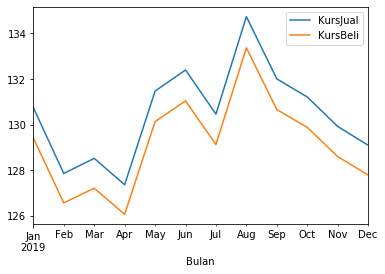

In [15]:
df.plot()

## Kesimpulan

Apabila kita amati grafik pergerakan kurs JPY, nilai kurs jual dan kurs beli cenderung turun dalam kurun waktu 1 tahun. Jika kita membeli Yen pada bulan Januari 2019 dan menjualnya kembali pada bulan Desember 2019, maka akan kita dapati nilai tukarnya menurun sehingga kita mengalami kerugian. Dengan demikian, berdasarkan analisa kita terhadap pergerakan kurs JPY tahun 2019 dapat disimpulkan bahwa uang Yen tidak bisa kita gunakan sebagai alat investasi.